**Ejemplo**. Se requiere diseñar un contenedor de desechos, cuya forma será la de un prisma rectangular de dimensiones x, y, z como se muestra en la figura. El volumen del contenedor deberá ser de 0.08 $m^3$. Por requerimientos, la altura debe estar en el rango 0.6-0.8 m, y los lados de la base deben medir al menos 0.1 m. Luego, la idea es diseñar el contenedor de tal forma que se utilice la menor cantidad de material posible. Nota: *El contenedor está abierto en la parte superior*.

<img src="/img/p1.jpg" width="150px">

La cantidad de material utilizada para fabricar el contenedor está directamente relacionada con el área del prisma rectangular, donde esta corresponde a la suma de las áreas para cada una de las caras, luego, basándonos en el esquema de la figura anterior, se puede expresar el área en función de sus dimensiones como sigue: 

$$ A(x_1,x_2,x_3) = 2x_1x_3 + 2x_2x_3 + x_1x_2 $$

De la restricción de volumen se tiene que:

$$ V = x_1 x_2 x_3 = 0.08\,\, \text{m}^3  \,\,\,\,\,\, \rightarrow \,\,\,\,\,\, x_3 = \frac{V}{x_1 x_2} $$

Entonces, sustituyendo $x_3$ en la primera ecuación podemos reescribirla en términos de $x_1$ y $x_2$ , como sigue:

$$ A(x_1,x_2) = 2\frac{V}{x_2} + 2\frac{V}{x_1} + x_1x_2 $$

Se pide que $0.6 \leq x_3 \leq 0.8$, lo cual se puede expresar como dos ecuaciones de restricción:

$$ g_1(x_1,x_2) = \frac{V}{x_1x_2} - 0.6 \geq 0 $$
$$ g_2(x_1,x_2) = \frac{V}{x_1x_2} - 0.8 \leq 0 $$

Además, para los requirimientos dimensionales de la base se tiene:

$$ g_3(x_1,x_2) = x_1 - 0.1 \geq 0 $$
$$ g_4(x_1,x_2) = x_2 - 0.1 \geq 0 $$



# Óptimo no restringido

Un valor óptimo no restringido puede calcularse mediante herramientas elementales de cálculo variacional. Para obtener un punto crítico se resuelve el sistema de ecuaciones resultante de igualar a cero el gradiente de la función, es decir:

$$ \left[ \vec{\nabla} f \right] = [0] $$

Esto lo podemos calcular utilizando SymPy. Importamos la librería y las funciones `hessian` y `zeros` del módulo `matrices`:

In [1]:
from __future__ import division
import sympy as sym
from sympy.matrices import hessian, zeros
sym.init_printing(use_latex="mathjax")

def gradient(f, varls):
    """ Calcula el gradiente de una función f(x1,x2,...)"""
    n = len(varls)
    G = zeros(n,1)
    for i in range(n):
        G[i] = f.diff(varls[i])
    return G

Definimos las variables simbólicas a utilizar y la función $A(x_1,x_2)$

In [2]:
x1,x2,V = sym.symbols("x_1,x_2,V")
A = 2*(V/x2) + 2*(V/x1) + x1*x2

Calculamos el gradiente de la función y establecemos el sistema de ecuaciones:

In [3]:
G = gradient(A.subs(V,0.08), (x1,x2))
sym.Eq(G,zeros(2,1))

⎡     0.16⎤      
⎢x₂ - ────⎥ = ⎡0⎤
⎢       2 ⎥   ⎢ ⎥
⎢     x₁  ⎥   ⎣0⎦
⎢         ⎥      
⎢     0.16⎥      
⎢x₁ - ────⎥      
⎢       2 ⎥      
⎣     x₂  ⎦      

Resolviendo el sistema de ecuaciones, se tiene:

In [4]:
sol = sym.solve(sym.Eq(G,zeros(2,1)), (x1,x2))
sol

[(0.542883523318981, 0.542883523318981), (-0.271441761659491 - 0.4701509224902
39⋅ⅈ, -0.271441761659491 - 0.470150922490239⋅ⅈ), (-0.271441761659491 + 0.47015
0922490239⋅ⅈ, -0.271441761659491 + 0.470150922490239⋅ⅈ)]

Se obtienen dos soluciones complejas y una real, además, la solución real presenta dos valores iguales. 

Hasta ahora sabemos que la solución obtenida es un punto crítico, pero no podemos asegurar si es un máximo, un mínimo o un punto de silla. Luego, para comprobar si el punto calculado es un mínimo se puede utilizar el siguiente teorema:

> **Teorema 1**. *Condición necesaria*: si $f(x)$ tiene un mínimo local en $x^*$ entonces:
>
> $$ \frac{\partial f(x^*)}{\partial x_i} = 0 ; \,\,\,\, i=1,2,...,n $$
> 
> *Condición necesaria de segundo orden*: si $f(x)$ tiene un mínimo local en $x^*$, entonces la matriz Hessiana 
> 
> $$ H(x^*) = \left[ \frac{\partial^2 f}{\partial x_i \partial x_j} \right]_{(nxn)} $$
>
> es positiva definida o semidefinida en el punto $x^*$.
> 
> *Condición suficiente de segundo orden*: si la matriz $H(x^*)$ es positiva definida en el punto estacionario $x^*$, 
> entonces $x^*$ es un mínimo local para la función $f(x)$. 
>
> Una matriz es positiva definida si sus eigenvalores son estrictamente positivos, es decir: $\lambda_i > 0$

De acuerdo al teorema 1, para que el punto calculado sea un mínimo, los eigenvalores de la matriz Hessiana de $A(x_1, x_2)$ evaluada en el punto crítico deben ser positivos. 

Calculando la matriz Hessiana:

In [5]:
H = hessian(A, (x1,x2))
# evaluando en el punto calculado
_x1, _x2 = sol[0][0], sol[0][1]
H = H.subs({x1:_x1, x2:_x2, V:0.08})
H

⎡2.0   1 ⎤
⎢        ⎥
⎣ 1   2.0⎦

Calculando los eigenvalores:

In [6]:
egvals = H.eigenvals()
egvals

{1: 1, 3: 1}

Dado que tanto $\lambda_1 = 1$ como $\lambda_2 = 3$ son positivos, entonces el punto calculado es un mínimo global no restringido.

Ahora, si calculamos el valor de la altura $x_3$:

In [59]:
_x3 = 0.08/(_x1*_x2)
_x3

0.271441761659491

Vemos que no cumple con la restricción de altura dada. En lo subsiguiente se abordará el cómo utilizar otros métodos para resolver problemas de optimización con restricciones.

# Óptimización con restricciones

La optimización con restricciones implica tomar en cuenta ecuaciones que definen regiones factibles. Uno de los métodos más simples para resolver problemas con restricciones es el método gráfico.

## Usando el método gráfico

Resolver un problema de optimización por el método gráfico implica trazar las gráficas de contorno de la función objetivo, así como las regiones definidas por las restricciones, y luego mediante inspección ubicar el punto que optimice la función objetivo. Claro está que es un método que puede resultar poco preciso, pero normalmente sirve para dar una aproximación aceptable y que pueda utilizarse como punto de entrada para algoritmos numéricos como los que se verán en la siguiente sección.

Lo primero que haremos es importar las librerías a utilizar: NumPy y Matplotlib.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Posteriormente definimos la función objetivo y las restricciones:

In [54]:
V = 0.08
xmin,xmax,ymin,ymax = 0,1,0,1
xx1 = np.linspace(xmin,xmax)
xx2 = np.linspace(ymin,ymax)
x1, x2 = np.meshgrid(xx1, xx2)
f = 2*(V/x2) + 2*(V/x1) + x1*x2
g1 = (V/(x1*x2)) - 0.6
g2 = (V/(x1*x2)) - 0.8
g3 = x1 - 0.1
g4 = x2 - 0.1

Para trazar la gráfica de contorno de $A(x_1,x_2)$ utilizamos la función `contour`:

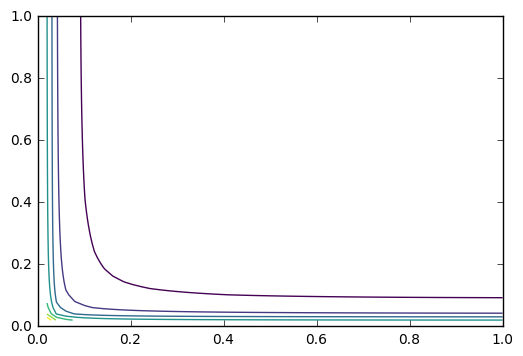

In [57]:
plt.contour(x1, x2, f, cmap="viridis")

Vemos que la gráfica obtenida no parece muy adecuada, esto debido a que los niveles utilizados por defecto no se ajustan a la función en cuestión. Si evaluamos $A(x_1,x_2)$ en el punto óptimo no restringido de la sección anterior se tiene:

In [63]:
A.subs({"x_1":_x1,"x_2":_x2,"V":0.08})

0.884167559673693

Luego, se pueden utilizar niveles personalizados para la función `contour`, partiendo desde el valor mínimo anterior:

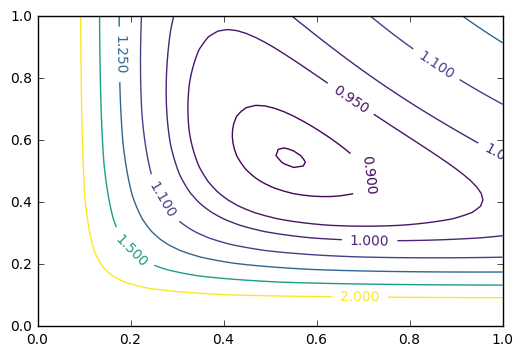

In [76]:
lvl = [0.885, 0.9, 0.95, 1.0, 1.1, 1.25, 1.5, 2.0]
cl = plt.contour(x1, x2, f, levels=lvl, cmap="viridis")
plt.clabel(cl);

Ahora trazamos las gráficas de las restricciones como se muestra enseguida:

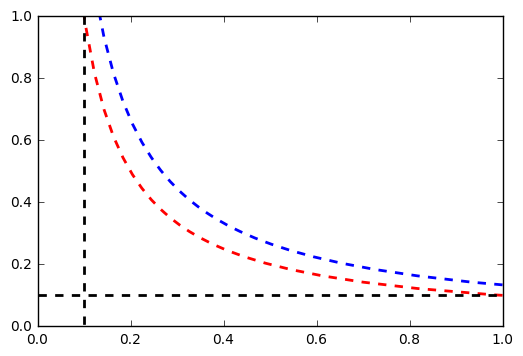

In [77]:
plt.contour(x1, x2, g1, levels=[0], linestyles='--', linewidths=2, colors="b")
plt.contour(x1, x2, g2, levels=[0], linestyles='--', linewidths=2, colors='r')
plt.contour(x1, x2, g3, levels=[0], linestyles='--', linewidths=2, colors='k')
plt.contour(x1, x2, g4, levels=[0], linestyles='--', linewidths=2, colors='k');

De la gráfica anterior, la región factible corresponde a la región ubicada entre las líneas rojas y azules correspondientes a las ecuaciones de restricción para la altura $g_1$ y $g_2$. Esto se puede hacer más evidente se utilizamos la función `contourf`.

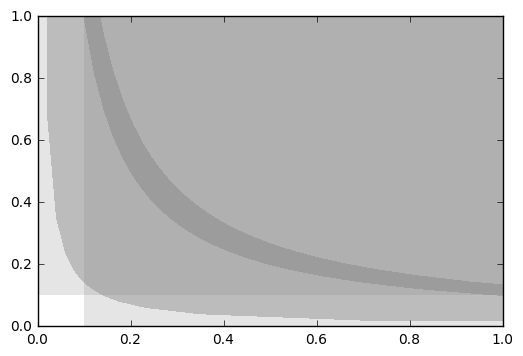

In [119]:
plt.contourf(x1, x2, g1, levels=[0,5], colors="#808080", alpha=0.4)
plt.contourf(x1, x2, g2, levels=[-5,0], colors="#808080", alpha=0.4)
plt.contourf(x1, x2, g3, levels=[0,1], colors="#808080", alpha=0.2)
plt.contourf(x1, x2, g4, levels=[0,1], colors="#808080", alpha=0.2);

Donde la región más oscura corresponde a la región factible.

Trazando todo lo anterior en una misma gráfica:

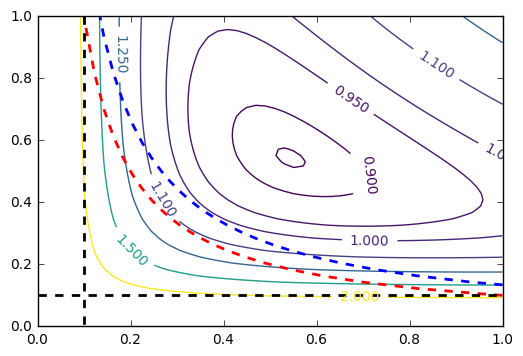

In [122]:
lvl = [0.885, 0.9, 0.95, 1.0, 1.1, 1.25, 1.5, 2.0]
cl = plt.contour(x1, x2, f, levels=lvl, cmap="viridis")
plt.clabel(cl)
plt.contour(x1, x2, g1, levels=[0], linestyles='--', linewidths=2, colors="b")
plt.contour(x1, x2, g2, levels=[0], linestyles='--', linewidths=2, colors='r')
plt.contour(x1, x2, g3, levels=[0], linestyles='--', linewidths=2, colors='k')
plt.contour(x1, x2, g4, levels=[0], linestyles='--', linewidths=2, colors='k');

#ax.plot([0.365],[0.365], 'wo')
#ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)

Por inspección podemos observar que el punto (0.365, 0.365) podría ser un punto óptimo aproximado:

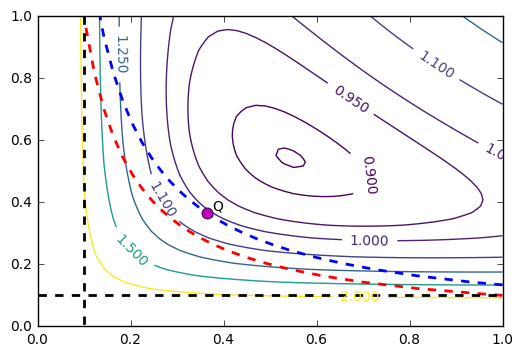

In [137]:
lvl = [0.885, 0.9, 0.95, 1.0, 1.1, 1.25, 1.5, 2.0]
cl = plt.contour(x1, x2, f, levels=lvl, cmap="viridis")
plt.clabel(cl)
plt.contour(x1, x2, g1, levels=[0], linestyles='--', linewidths=2, colors="b")
plt.contour(x1, x2, g2, levels=[0], linestyles='--', linewidths=2, colors='r')
plt.contour(x1, x2, g3, levels=[0], linestyles='--', linewidths=2, colors='k')
plt.contour(x1, x2, g4, levels=[0], linestyles='--', linewidths=2, colors='k');
plt.plot([0.365],[0.365], 'mo', markersize=8)
plt.text(0.365 + 0.01, 0.365 + 0.01, "Q");

## Utilizando SciPy

In [153]:
from scipy.optimize import minimize

def A(x):
    v = 0.08
    return 2*(v/x[1]) + 2*(v/x[0]) + x[0]*x[1]
    
def dxA(x):
    v = 0.08
    dfdx0 = -2*(v/x[0]**2) + x[1]
    dfdx1 = -2*(v/x[1]**2) + x[0]
    return np.array([dfdx0, dfdx1])

cons = ({'type': 'ineq',
        'fun' : lambda x: np.array([x[0] - 0.1]),
        'jac' : lambda x: np.array([1,0])},
        {'type': 'ineq',
        'fun' : lambda x: np.array([x[1] - 0.1]),
        'jac' : lambda x: np.array([0,1])},
        {'type': 'ineq',
        'fun' : lambda x: np.array([0.08/(x[0]*x[1]) - 0.6]),
        'jac' : lambda x: np.array([-0.08/(x[0]**2*x[1]), -0.08/(x[0]*x[1]**2)])},
        {'type': 'ineq',
        'fun' : lambda x: -np.array([0.08/(x[0]*x[1]) - 0.8]),
        'jac' : lambda x: -np.array([-0.08/(x[0]**2*x[1]), -0.08/(x[0]*x[1]**2)])},
       )
        
#~ cons = ({'type': 'ineq',
        #~ 'fun' : lambda x: np.array([x[0] - 0.1])},
        #~ {'type': 'ineq',
        #~ 'fun' : lambda x: np.array([x[1] - 0.1])},
        #~ {'type': 'ineq',
        #~ 'fun' : lambda x: np.array([0.08/(x[0]*x[1]) - 0.6])}
        #~ )
    
res = minimize(A, [0.3,0.3], method='SLSQP', jac= dxA, 
               constraints=cons)
res

     fun: 1.0096894255035318
     jac: array([-0.83485163, -0.83485163,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.36514837,  0.36514837])